## The Sparks Foundation - Data Science & Business Analytics Internship


## Author : Tuhin Majumdar

## GRIP Task 2 : Prediction Using Unsupervised Machine Learning

### Importing important library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importing warning module to filter out warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Loading the Iris dataset

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Consider the last four featues as 'Id' is unique

In [5]:
X = df.iloc[:,1:5].values

### Import 'KMeans' class from the module 'cluster' present in sklearn library

In [6]:
from sklearn.cluster import KMeans

### Setting up number of clusters upto 10 numbers 

In [7]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter = 300, n_init = 10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [8]:
print(wcss)

[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.56163015873016, 38.930963049671746, 34.19068792479662, 30.06387443273313, 27.84235606060606, 26.048202248044355]


 - wcss - It is the sum of squared distance between each point and the centroid in a cluster. We can see as the no of cluster increases from 1 to 10,the value of wcss reduces to minimum

### Plot a graph between no of cluster and wcss value

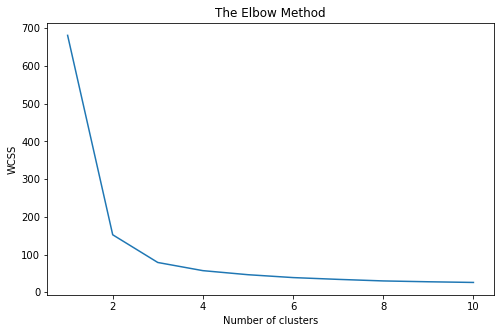

In [9]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

 - Observation - The optimum number of cluster is that point from where the elbow occurs. Here it is 3

### Applying KMeans to the dataset

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### Create a dataframe for better comprehension of cluster and species

In [37]:
pd.DataFrame(index=['Cluster','Species'],data=[y_kmeans,df['Species']])

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
Cluster,1,1,1,1,1,1,1,1,1,1,...,2,2,0,2,2,2,0,2,2,0
Species,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,...,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica


 - From the above dataframe we can conclude that cluster 1 belongs to Iris setosa, cluster 0 belongs to Iris-versicolor and cluster 2 belongs to Iris-verginica (though there is very few overlapping)

### Visualising the clusters - using 'sepal length' and 'sepal width'

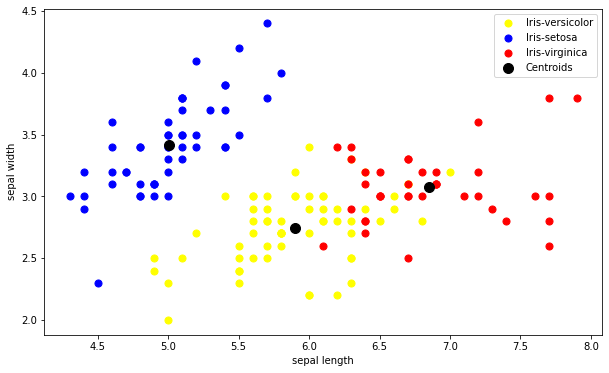

In [12]:
plt.figure(figsize=(10,6))

# Plotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'yellow', label = 'Iris-versicolor')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'red', label = 'Iris-virginica')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()

### Visualising the clusters - using 'petal length' and 'petal width'

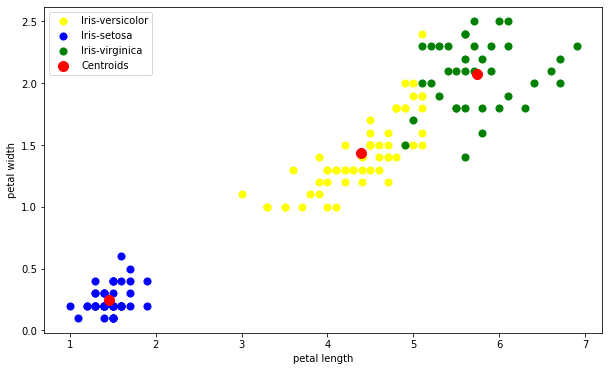

In [13]:
plt.figure(figsize=(10,6))

# Plotting the clusters
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s = 50, c = 'yellow', label = 'Iris-versicolor')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s = 50, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s = 50, c = 'green', label = 'Iris-virginica')
plt.xlabel('petal length')
plt.ylabel('petal width')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], s = 100, c = 'red', label = 'Centroids')
plt.legend()

### This concludes KMeans task